In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris
iris=load_iris()

In [3]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [4]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [10]:
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


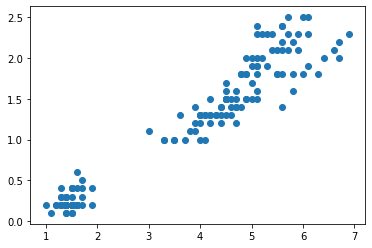

In [11]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])

In [18]:
k_rng=range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[["petal length (cm)","petal width (cm)"]])
    sse.append(km.inertia_)

In [19]:
sse

[550.8953333333334,
 86.39021984551397,
 31.371358974358973,
 19.477123363965468,
 13.916908757908757,
 11.025145110250374,
 9.203314009661835,
 7.615402244955953,
 6.480259206692711]

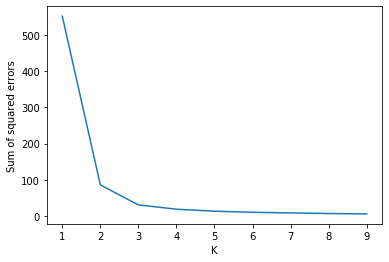

In [20]:
plt.xlabel('K')
plt.ylabel('Sum of squared errors')
plt.plot(k_rng,sse)

In [22]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[["petal length (cm)","petal width (cm)"]])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [23]:
df["clusters"]=y_predicted
df.head()

,petal length (cm),petal width (cm),clusters
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [24]:
km.cluster_centers_

array([[1.462     , 0.246     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

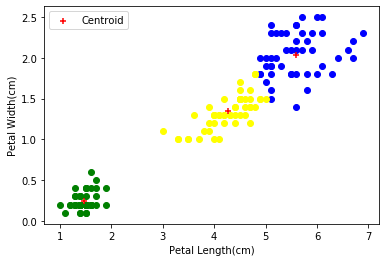

In [27]:
df0=df[df.clusters==0]
df1=df[df.clusters==1]
df2=df[df.clusters==2]
plt.scatter(df0["petal length (cm)"],df0["petal width (cm)"],color='green')
plt.scatter(df1["petal length (cm)"],df1["petal width (cm)"],color='blue')
plt.scatter(df2["petal length (cm)"],df2["petal width (cm)"],color='yellow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="red",marker='+',label="Centroid")
plt.xlabel("Petal Length(cm)")
plt.ylabel("Petal Width(cm)")
plt.legend()